## FHNW Machine Learning - FS2024

In [74]:
# DO NOT EDIT

# Notebook configs
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Bewertete Übung 03

**Ausgabe:** Montag 20.05.2024

**Abgabe:**  Montag 10.06.2024, 23:59 Uhr


## Vorgaben zu Umsetzung und Abgabe

- Die Algorithmen müssen auf der Basis von Array Operationen selber implementiert werden.
- Der Code muss lauffähig sein bei Ausführung im Docker-Container zum Repo oder auf JHub. 
- Es darf kein Code ausgelagert werden, i.e. sämtlicher Code muss sich im Notebook befinden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Überschrift, Colorbar, ..), so dass der Plot ohne den Code zu konsultieren, verstanden werden kann.
- Zu jedem Plot gehört eine kurze Diskussion, welche den Plot erklärt und die wichtigsten Einsichten, die damit sichtbar werden, festhält.  
- Als **Abgabe** zählt der letzte Commit vor Abgabetermin in in Ihrem Fork des Repos.  

- **Bitte löschen, duplizieren (splitten!) und verschieben Sie die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Sie dürfen aber beliebig viele weitere Zellen hinzufügen.
- Laufzeit vom Notebook: Das Notebook sollte in weniger als 30 Minuten ausgeführt werden können.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden.**


### Module

Neben den Python-Basismodulen dürfen Sie die folgenden Module immer benutzen: `numpy`, `pandas`, `matplotlib`, `seaborn`,  `tqdm`.

Sie dürfen auch generell [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), [`sklearn.model_selection`](https://scikit-learn.org/stable/model_selection.html) und [`sklearn.compose`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose) benutzen.

Zusätzliche Module dürfen Sie nur verwenden wenn ausdrücklich erwähnt oder bereits vorgegeben in der Code-Cell.

## Bewertung

Bewertet wird:

- Vollständigkeit (Code, Text)
- Korrektheit (Code, Text)
- Implementation (z.B. Vektorisierung der Operationen, Scikit-Learn API, Visualisierungen, Lesbarkeit Code/Output)

## Einleitung

Daniele arbeitet bei einem grossen Schweizer TV-Anbieter und hat von Mika erfahren, dass Sie mit Machine-Learning echten Mehrwert liefern können. Daniele hat den Auftrag bekommen Film-Empfehlungen für Kunden zu erstellen, damit die Kunden bessere Vorschläge bekommen und das neue Streaming-Angebot nutzen. Das Management möchte, dass Daniele mit modernen Machine-Learning Ansätzen arbeitet und diese evaluiert. Insbesondere soll [_collaborative filtering_](https://en.wikipedia.org/wiki/Collaborative_filtering) ausprobiert werden, wobei Kunden mit ähnlichen Präferenzen gefunden werden um dann gemeinsam (_collaborative_) Empfehlungen generieren zu können. 

Das Modell soll in Echtzeit, also sobald neue _Ratings_ verfügbar sind, aktualisiert werden können. Deshalb hat man entschieden einen Ansatz zu wählen mit dem man mit _Stochastic Gradient Descent (SGD)_ das Modell mit einzelnen Beobachtungen anpassen (trainieren) kann. Das wäre auch in Echtzeit aktualisierbar.

In einem ersten Schritt soll mit öffentlich verfügbaren Daten ein Modell erstellt und getestet werden um zu beurteilen, ob sich weitere Investments in Empfehlungssysteme lohnen. Sie sollen Daniele dabei unterstützen und auf dem bekannten [_MovieLens_](https://movielens.org/) Datensatz einen Prototyp erstellen.



## Ziel

Unser Ziel ist es zu beantworten ob es möglich ist sinnvolle Empfehlungen zu generieren.

## Aufgabe 1 (8 Punkte)

In dieser Aufgabe geht es darum die Daten einzulesen, kennenzulernen und für die Modellierung vorzubereiten.



### Aufgabe 1a

Lesen Sie die Datensätze `movies.csv` und `ratings.csv` ein.

Charakterisieren Sie die Datensätze indem Sie folgende Aufgaben erledigten, bzw. Fragen beantworten. Nur die Beantwortung der folgenden Fragen wird bewertet:

1. Beschreiben Sie die Datensätze kurz in Worten: Was ist jeweils der Inhalt und wie hängen die beiden Datensätze zusammen?
2. Erstellen Sie die Rating-Matrix $R$ mit dem bereitgestellten Code `create_rating_matrix`. $R$ hat die Dimensionalität $R \in \mathbb{R}^{N_u  x N_i}$, wobei $N_u$ die Anzahl Users sind und $N_i$ die Anzahl Filme (Items). Der Eintrag $r_{u,i}$ indexiert das Rating von User $u$ für den Film $i$ in $R$. Verifizieren Sie, dass die Anzahl Zeilen und die Anzahl Spalten stimmen.
3. Was ist die _Sparsity_ von $R$?
4. Zeigen Sie anhand von $R$ die Verteilung über die Ratings und beschreiben Sie diese mit Worten.
5. Zeigen Sie anhand von $R$ die Verteilung über jeweils die mittleren User- und die mittleren Movie Ratings.
6. Welcher Film wurde am besten, welcher am schlechtesten bewertet?
7. Untersuchen Sie den Zusammenhang von "imdbRating" / "imdbVotes" und den bereitgestellten Ratings in `ratings.csv`.
8. Finden Sie je einen Film und einen User welche "extrem" sind (bzw. mögliche Anomalien sind). Sie können das selber, sinnvoll, definieren.


Sie können die Fragen mit Code beantworten (mit Grafiken und/oder Print-Statements). Referenzieren Sie klar auf die Fragennummer. Beispiel:

```
print("1) Die Datensätze...")
print(f"3) Die Sparsity beträgt: {sparsity:.3f}")
```

Sie können auch eine zusätzliche Text-Zelle einfügen und Fragen so beantworten.

1. **Beschreiben Sie die Datensätze kurz in Worten: Was ist jeweils der Inhalt und wie hängen die beiden Datensätze zusammen?**\
   Die movies.csv Datei enthält Informationen zu Filmen. Die wesentlichen Spalten sind:
   - `movieId`: Eine eindeutige ID für jeden Film.
   - `title`: Der Titel des Films.
   - `isAdult`: Ein Indikator, ob der Film als Erwachsenenfilm (18+) klassifiziert ist (0 oder 1).
   - `year`: Das Jahr, in dem der Film veröffentlicht wurde.
   - `runtime`: Die Laufzeit des Films in Minuten.
   - `genres`: Die Genres, zu denen der Film gehört als Array (`['genre1', 'genre2']`). 
   - `imdbRating`: Die Bewertung des Films auf IMDb.
   - `imdbVotes`: Die Anzahl der Bewertungen, die der Film auf IMDb erhalten hat.
   
   Die ratings.csv Datei enthält Informationen zu den Bewertungen der Filme durch die Benutzer. Die wesentlichen Spalten sind:

   - `userId`: Eine eindeutige ID für jeden Benutzer.
   - `movieId`: Eine eindeutige ID für jeden Film.
   - `rating`: Die Bewertung, die ein Benutzer einem Film gegeben hat (von 0.0 bis 5.0).
   - `timestamp`: Der Zeitstempel, wann die Bewertung abgegeben wurde.
  
   Die beiden Datensätze sind durch die `movieId` Spalte verbunden.


2. **Erstellen Sie die Rating-Matrix $R$ mit dem bereitgestellten Code `create_rating_matrix`. $R$ hat die Dimensionalität $R \in \mathbb{R}^{N_u  x N_i}$, wobei $N_u$ die Anzahl Users sind und $N_i$ die Anzahl Filme (Items). Der Eintrag $r_{u,i}$ indexiert das Rating von User $u$ für den Film $i$ in $R$. Verifizieren Sie, dass die Anzahl Zeilen und die Anzahl Spalten stimmen.** \
   Die Anzahl Zeilen und Spalten der Rating-Matrix $R$ sind 610 x 3647, also 610 Benutzer und 3647 Filme. 


3. **Was ist die _Sparsity_ von $R$?**\
   Die Sparsity von $R$ beträgt 95.9%. Das bedeutet, dass 95.9% der Einträge in $R$ fehlen.


4. **Zeigen Sie anhand von $R$ die Verteilung über die Ratings und beschreiben Sie diese mit Worten.** \
   2'134'443 Bewertungen von Filmen fehlen - dies geht auch aus dem rechten Plot "Verteilung der Ratings (mit fehlenden Ratings)" hervor und wiederspiegelt ebenfalls die hohe Sparsity von 95.9%. Dies ist nicht ungewöhnlich, da die meisten Benutzer nur ein kleiner Teil alle Filme bewerten.
   Betrachten wir allerdings nur die Verteilung von vorhandenen Ratings, so sehen wir, dass die meisten Bewertungen über 3.0 liegen.


5. **Zeigen Sie anhand von $R$ die Verteilung über jeweils die mittleren User- und die mittleren Movie Ratings.** \
   Die Verteilung der mittleren Ratings zeigt, dass die meisten Benutzer und Filme durchschnittliche Bewertungen im Bereich von 3 bis 4.5 haben.


6. **Welcher Film wurde am besten, welcher am schlechtesten bewertet?** \
   Der beste bewertete Film ist 'The Trial' mit einer durchschnittlichen Bewertung von 4.90. \
   Der schlechteste bewertete Film ist 'Police Academy: Mission to Moscow' mit einer durchschnittlichen Bewertung von 0.80.


7. **Untersuchen Sie den Zusammenhang von "imdbRating" / "imdbVotes" und den bereitgestellten Ratings in `ratings.csv`.** \
   Ich habe jeweils den Zusammenhang zwischen den Bewertungen und Anzahl Bewertungen auf IMDb und vom `ratings.csv` untersucht. Dabei ist mir keine klare Korrelation aufgefallen. Folgende Beobachtungen habe ich gemacht:
   - Es fällt auf, dass sich die Bewertungen von IMDb grösstenteils zwischen 5 und 8 bewegen, während sich die Bewertungen aus `ratings.csv` über den Bereich 2 bis 4 erstrecken. Normalisieren wir die beiden Bewertungsskalen, so befinden sich die Bewertungen etwa im gleichen Bereich (IMDb-Skala ≈ 2 * `ratings.csv`-Skala). Bezogen auf die einzelnen Filmen ist keine klare Korrelation zu erkennen. \
   - Die Anzahl der Bewertungen auf IMDb beläuft sich, mit wenigen Ausnahmen, auf weniger als 1'000'000. In `ratings.csv` sind die meisten Filme weniger als 150 mal bewertet worden. \

8. **Finden Sie je einen Film und einen User welche "extrem" sind (bzw. mögliche Anomalien sind). Sie können das selber, sinnvoll, definieren.** \
   Eine hohe Varianz der Bewertungen (erhaltene Bewertungen für die Filme und die abgegebenen Bewertungen eines Users) wurde als Massstab für "extreme" Filme und Benutzer verwendet. \
   Der Film mit der höchsten Varianz der Bewertungen ist 'Mr. Wrong' (Movie ID 102) mit einer Varianz von 3.04. \
   Der Benutzer mit der höchsten Varianz der Bewertungen ist User ID 461 mit einer Varianz von 3.10. \
   Beide "extreme" Beispiele sind im Histogramm als klare "Ausreisser" erkennbar.

2) Die Rating-Matrix hat die Dimensionen: (610, 3647).
3) Die Sparsity beträgt: 0.959
4) Verteilung der Ratings.
   Fehlenden Ratings: 2134443


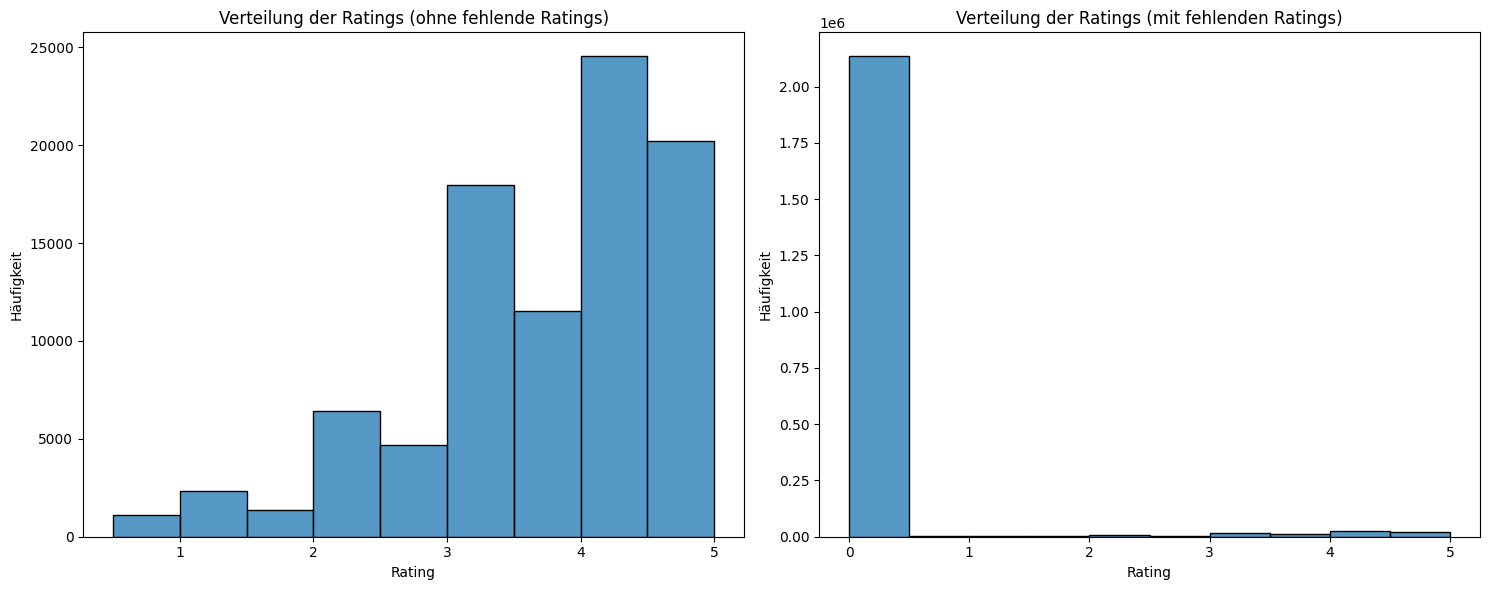

5) Verteilung der mittleren Ratings pro Benutzer und Film (ohne fehlende Ratings).


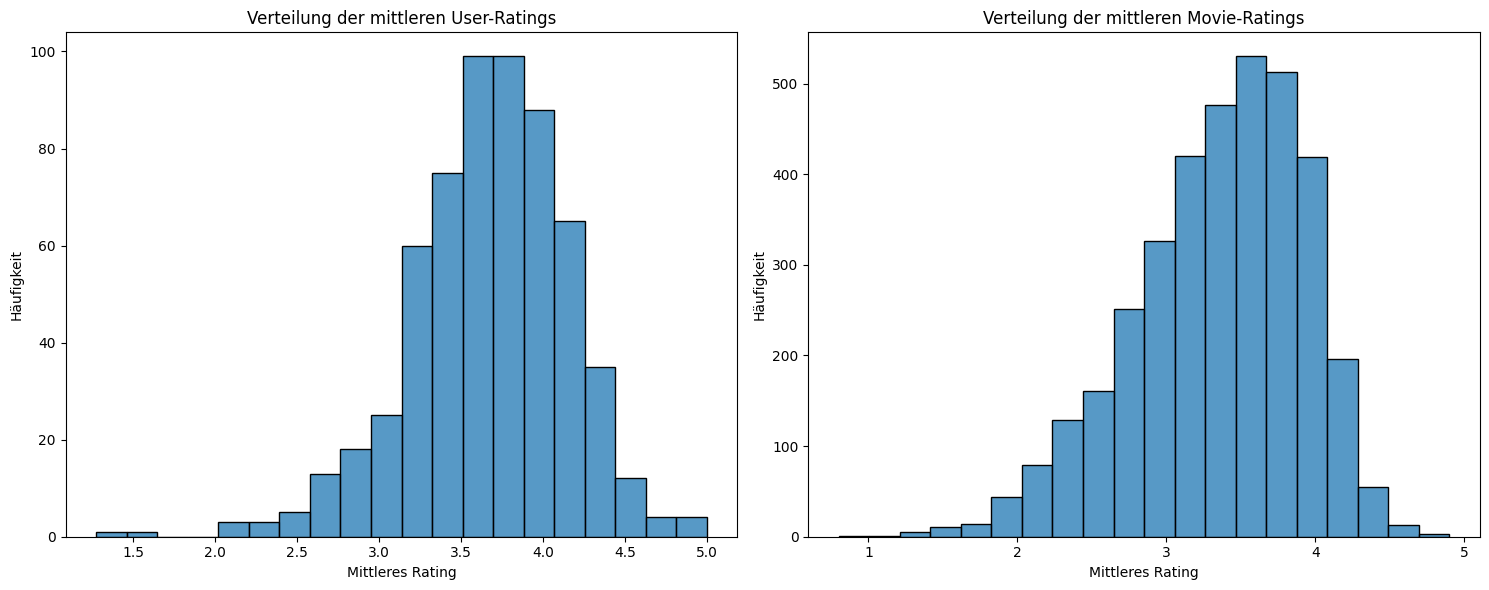

6) Der beste bewertete Film ist 'The Trial' mit einer durchschnittlichen Bewertung von 4.90.
   Der schlechteste bewertete Film ist 'Police Academy: Mission to Moscow' mit einer durchschnittlichen Bewertung von 0.80.
7) Zusammenhänge zwischen IMDB-Rating, IMDB Votes und durchschnittlichem Rating.


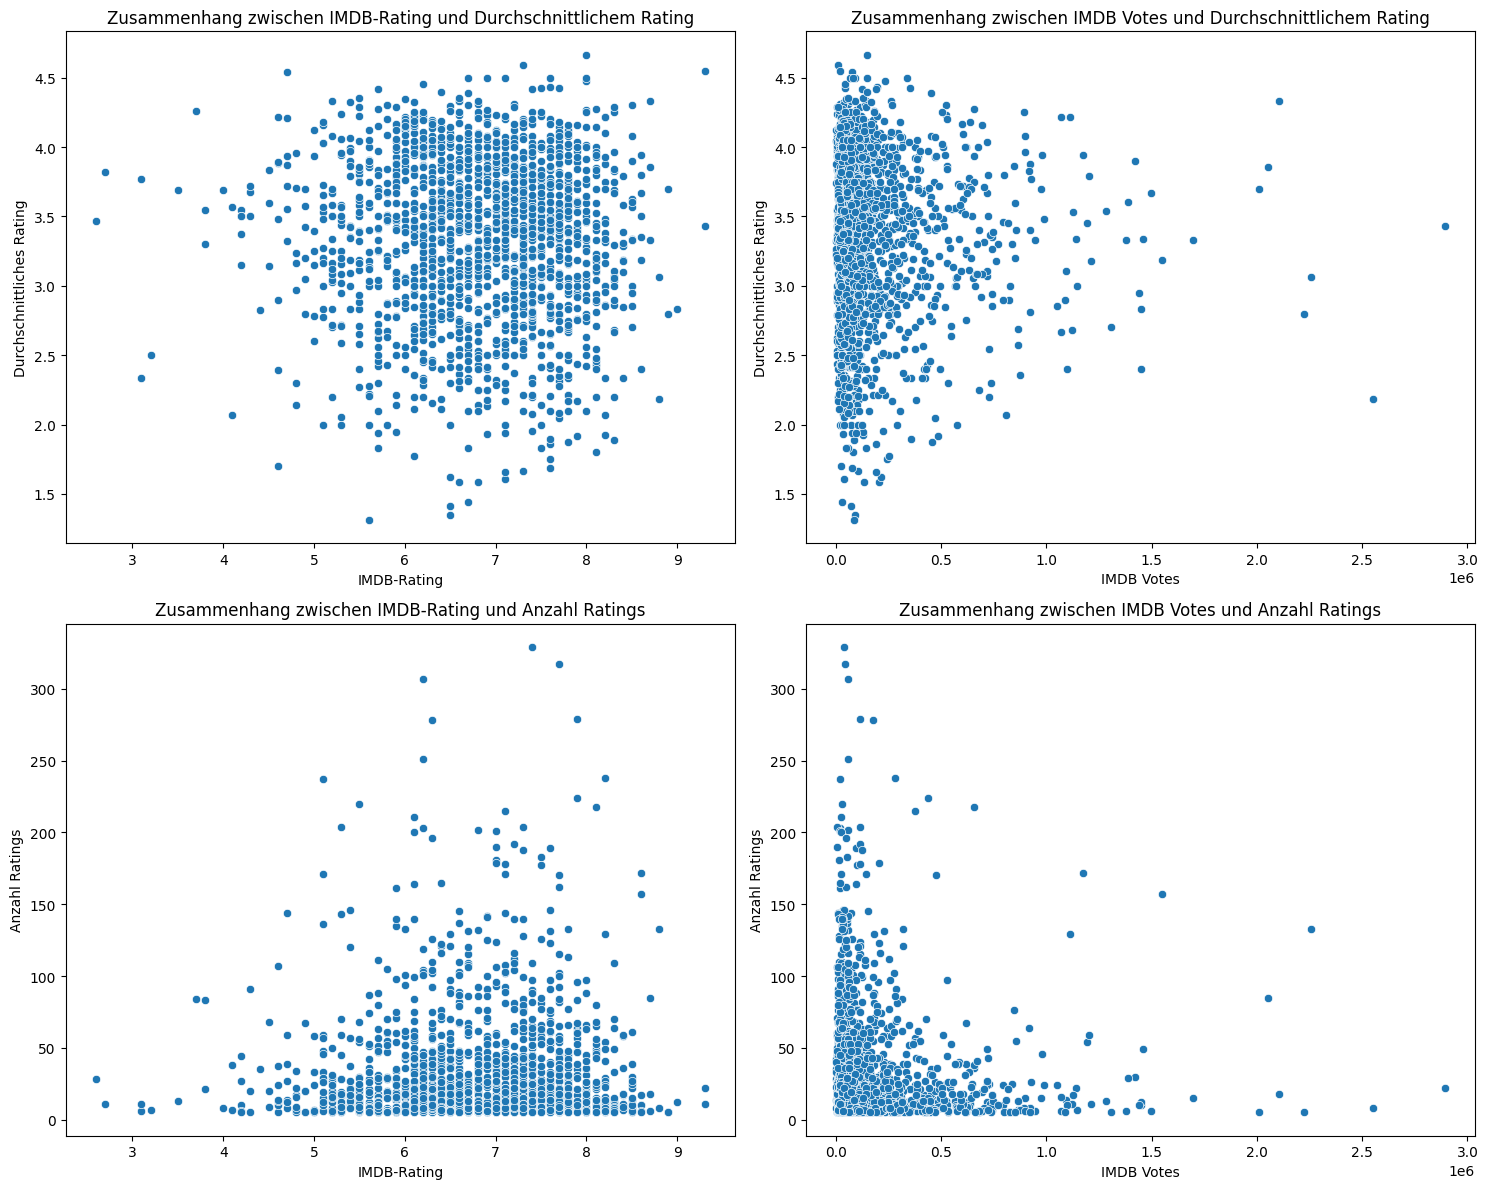

8) Extrem bewertete Filme basierend auf Varianz:
   Der Film mit der höchsten Varianz der Bewertungen ist 'Mr. Wrong' (Movie ID 102) mit einer Varianz von 3.04.
   Extrem bewertende Benutzer basierend auf Varianz:
   Der Benutzer mit der höchsten Varianz der Bewertungen ist User ID 461 mit einer Varianz von 3.10.


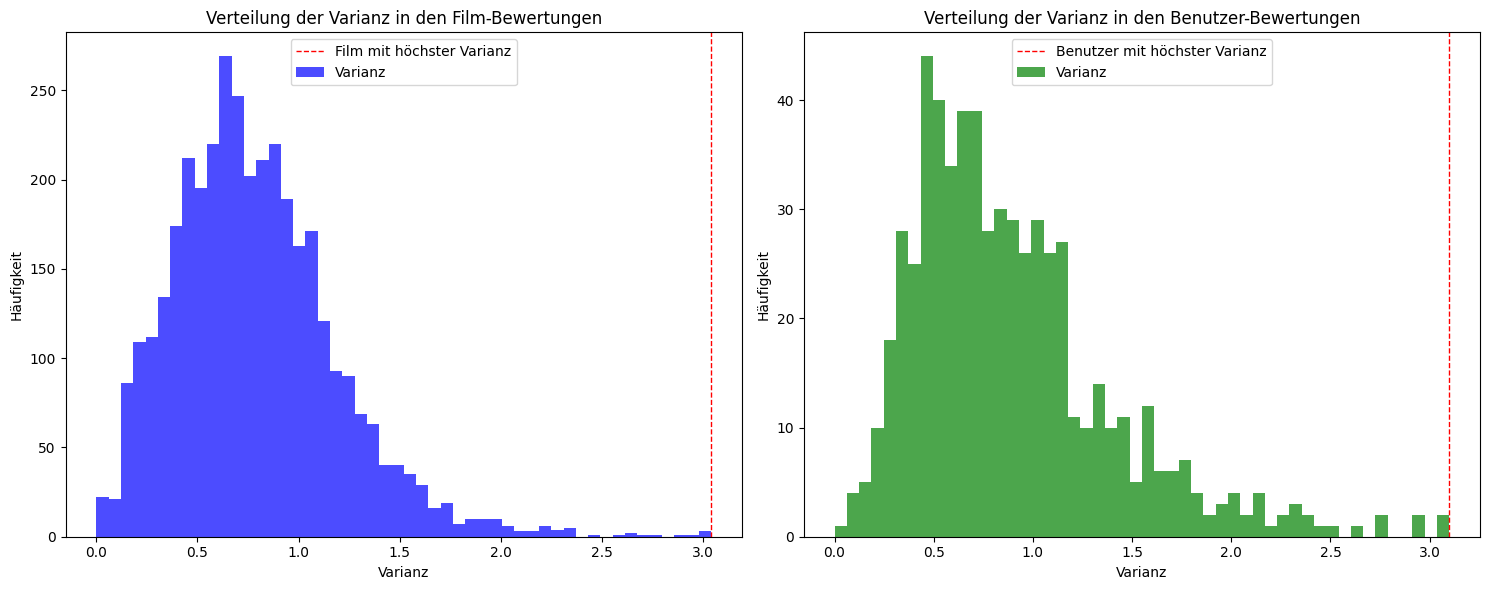

In [75]:
from typing import Dict, Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')


def create_rating_matrix(df: pd.DataFrame) -> (np.ndarray, Dict[int, int], Dict[int, int]):
    """Create Ratings Matrix and Mapping Tables. 
        
        Args:
            df: pd.DataFrame with columns [movieId, userId, rating]
    
        Returns:
                Ratings-Matrix (np.ndarray),
                Column-No to Movie-ID Mapper (Dict[column_number, movieId]),
                Row-No to User-ID Mapper (Dict[row_number, userId])

        Remark:
            Zero-Entries in Ratings-Matrix are missing / non-existing ratings
    """
    # Mapping Tables
    map_movie_to_id = {k:i for i, k in enumerate(df['movieId'].unique())}
    map_user_to_id = {k:i for i, k in enumerate(df['userId'].unique())}
    
    map_col_id_to_movie = {v: k for k, v in map_movie_to_id.items()}
    map_row_id_to_user_id = {v: k for k, v in map_user_to_id.items()}

    mapped_user_id = df['userId'].map(map_user_to_id)
    mapped_movie_id = df['movieId'].map(map_movie_to_id)
    
    # Create Ratings Matrix
    from scipy.sparse import csc_matrix
    ratings = csc_matrix(
        (df['rating'], (mapped_user_id, mapped_movie_id)),
        shape=(len(map_user_to_id.keys()), 
               len(map_movie_to_id.keys()))).toarray()

    return ratings, map_col_id_to_movie, map_row_id_to_user_id


R, map_col_id_to_movie, map_row_id_to_user = create_rating_matrix(ratings)


# 1a.2)
num_users = len(ratings['userId'].unique())
num_movies = len(ratings['movieId'].unique())
assert R.shape == (num_users, num_movies), "Die Dimensionen der Rating-Matrix stimmen nicht überein."

print(f"2) Die Rating-Matrix hat die Dimensionen: {R.shape}.")


# 1a.3)
total_elements = R.shape[0] * R.shape[1]
non_zero_elements = np.count_nonzero(R)
sparsity = 1 - (non_zero_elements / total_elements)

print(f"3) Die Sparsity beträgt: {sparsity:.3f}")


# 1a.4)
fig, axs = plt.subplots(figsize=(15, 6), ncols=2)

ratings_values = R[R != 0].flatten()
_ = sns.histplot(ratings_values, bins=9, kde=False, ax=axs[0])
_ = axs[0].set_title('Verteilung der Ratings (ohne fehlende Ratings)')
_ = axs[0].set_xlabel('Rating')
_ = axs[0].set_ylabel('Häufigkeit')

ratings_values_with_missing = R.flatten()
_ = sns.histplot(ratings_values_with_missing, bins=10, kde=False, ax=axs[1])
_ = axs[1].set_title('Verteilung der Ratings (mit fehlenden Ratings)')
_ = axs[1].set_xlabel('Rating')
_ = axs[1].set_ylabel('Häufigkeit')

plt.tight_layout()

print(f"4) Verteilung der Ratings.")
print(f"   Fehlenden Ratings: {R[R == 0].size}")
plt.show()


# 1a.5)
fig, axs = plt.subplots(figsize=(15, 6), ncols=2)

mean_user_ratings = np.mean(R, axis=1, where=(R != 0))
_ = sns.histplot(mean_user_ratings[~np.isnan(mean_user_ratings)], bins=20, kde=False, ax=axs[0])
_ = axs[0].set_title('Verteilung der mittleren User-Ratings')
_ = axs[0].set_xlabel('Mittleres Rating')
_ = axs[0].set_ylabel('Häufigkeit')

mean_movie_ratings = np.mean(R, axis=0, where=(R != 0))
_ = sns.histplot(mean_movie_ratings[~np.isnan(mean_movie_ratings)], bins=20, kde=False, ax=axs[1])
_ = axs[1].set_title('Verteilung der mittleren Movie-Ratings')
_ = axs[1].set_xlabel('Mittleres Rating')
_ = axs[1].set_ylabel('Häufigkeit')

plt.tight_layout()

print("5) Verteilung der mittleren Ratings pro Benutzer und Film (ohne fehlende Ratings).")
plt.show()


# 1a.6)
mean_ratings_per_movie = np.nanmean(np.where(R != 0, R, np.nan), axis=0)

best_movie_idx = np.nanargmax(mean_ratings_per_movie)
worst_movie_idx = np.nanargmin(mean_ratings_per_movie)

best_movie_id = map_col_id_to_movie[best_movie_idx]
worst_movie_id = map_col_id_to_movie[worst_movie_idx]

best_movie_title = movies[movies['movieId'] == best_movie_id]['title'].values[0]
worst_movie_title = movies[movies['movieId'] == worst_movie_id]['title'].values[0]

print(f"6) Der beste bewertete Film ist '{best_movie_title}' mit einer durchschnittlichen Bewertung von {mean_ratings_per_movie[best_movie_idx]:.2f}.")
print(f"   Der schlechteste bewertete Film ist '{worst_movie_title}' mit einer durchschnittlichen Bewertung von {mean_ratings_per_movie[worst_movie_idx]:.2f}.")


# 1a.7)
merged_df = ratings.merge(movies, on='movieId')
avg_ratings_per_movie = merged_df.groupby('movieId')['rating'].mean()
avg_votes_per_movie = merged_df.groupby('movieId')['rating'].count()

fig, axs = plt.subplots(figsize=(15, 12), ncols=2, nrows=2)

_ = sns.scatterplot(x=movies['imdbRating'], y=avg_ratings_per_movie, ax=axs[0][0])
_ = axs[0][0].set_title('Zusammenhang zwischen IMDB-Rating und Durchschnittlichem Rating')
_ = axs[0][0].set_xlabel('IMDB-Rating')
_ = axs[0][0].set_ylabel('Durchschnittliches Rating')

_ = sns.scatterplot(x=movies['imdbVotes'], y=avg_ratings_per_movie, ax=axs[0][1])
_ = axs[0][1].set_title('Zusammenhang zwischen IMDB Votes und Durchschnittlichem Rating')
_ = axs[0][1].set_xlabel('IMDB Votes')
_ = axs[0][1].set_ylabel('Durchschnittliches Rating')

_ = sns.scatterplot(x=movies['imdbRating'], y=avg_votes_per_movie, ax=axs[1][0])
_ = axs[1][0].set_title('Zusammenhang zwischen IMDB-Rating und Anzahl Ratings')
_ = axs[1][0].set_xlabel('IMDB-Rating')
_ = axs[1][0].set_ylabel('Anzahl Ratings')

_ = sns.scatterplot(x=movies['imdbVotes'], y=avg_votes_per_movie, ax=axs[1][1])
_ = axs[1][1].set_title('Zusammenhang zwischen IMDB Votes und Anzahl Ratings')
_ = axs[1][1].set_xlabel('IMDB Votes')
_ = axs[1][1].set_ylabel('Anzahl Ratings')

plt.tight_layout()

print("7) Zusammenhänge zwischen IMDB-Rating, IMDB Votes und durchschnittlichem Rating.")
plt.show()


# 1a.8)
def find_extreme_movies_by_variance(ratings_matrix, col_to_movie):
    variance_ratings_per_movie = np.nanvar(np.where(ratings_matrix != 0, ratings_matrix, np.nan), axis=0)
    
    highest_variance_movie_idx = np.nanargmax(variance_ratings_per_movie)
    
    highest_variance_movie_id = col_to_movie[highest_variance_movie_idx]
    highest_variance = variance_ratings_per_movie[highest_variance_movie_idx]
    
    return highest_variance_movie_id, highest_variance

def find_extreme_users_by_variance(ratings_matrix, row_to_user):
    variance_ratings_per_user = np.nanvar(np.where(ratings_matrix != 0, ratings_matrix, np.nan), axis=1)
    
    highest_variance_user_idx = np.nanargmax(variance_ratings_per_user)
    
    highest_variance_user_id = row_to_user[highest_variance_user_idx]
    highest_variance = variance_ratings_per_user[highest_variance_user_idx]
    
    return highest_variance_user_id, highest_variance

extreme_movie_by_variance = find_extreme_movies_by_variance(R, map_col_id_to_movie)
highest_variance_movie_id = extreme_movie_by_variance[0]
highest_variance_movie = movies[movies['movieId'] == highest_variance_movie_id]['title'].values[0]
highest_variance_value = extreme_movie_by_variance[1]

extreme_user_by_variance = find_extreme_users_by_variance(R, map_row_id_to_user)
highest_variance_user_id = extreme_user_by_variance[0]
highest_variance_user = highest_variance_user_id
highest_variance_value_user = extreme_user_by_variance[1]

print(f"8) Extrem bewertete Filme basierend auf Varianz:")
print(f"   Der Film mit der höchsten Varianz der Bewertungen ist '{highest_variance_movie}' (Movie ID {highest_variance_movie_id}) mit einer Varianz von {highest_variance_value:.2f}.")

print(f"   Extrem bewertende Benutzer basierend auf Varianz:")
print(f"   Der Benutzer mit der höchsten Varianz der Bewertungen ist User ID {highest_variance_user} mit einer Varianz von {highest_variance_value_user:.2f}.")

variance_ratings_per_movie = np.nanvar(np.where(R != 0, R, np.nan), axis=0)
variance_ratings_per_user = np.nanvar(np.where(R != 0, R, np.nan), axis=1)

fig, axs = plt.subplots(figsize=(15, 6), ncols=2)

_ = axs[0].hist(variance_ratings_per_movie[~np.isnan(variance_ratings_per_movie)], bins=50, color='blue', alpha=0.7)
_ = axs[0].axvline(highest_variance_value, color='red', linestyle='dashed', linewidth=1)
_ = axs[0].set_title('Verteilung der Varianz in den Film-Bewertungen')
_ = axs[0].set_xlabel('Varianz')
_ = axs[0].set_ylabel('Häufigkeit')
_ = axs[0].legend(['Film mit höchster Varianz', 'Varianz'])

_ = axs[1].hist(variance_ratings_per_user[~np.isnan(variance_ratings_per_user)], bins=50, color='green', alpha=0.7)
_ = axs[1].axvline(highest_variance_value_user, color='red', linestyle='dashed', linewidth=1)
_ = axs[1].set_title('Verteilung der Varianz in den Benutzer-Bewertungen')
_ = axs[1].set_xlabel('Varianz')
_ = axs[1].set_ylabel('Häufigkeit')
_ = axs[1].legend(['Benutzer mit höchster Varianz', 'Varianz'])

plt.tight_layout()
plt.show()

## Aufgabe 2 (21 Punkte)

In dieser Aufgabe implementieren Sie einen Sklearn-Estimator um ein Modell der Daten zu fitten mit dem Empfehlungen generiert werden können.


### Aufgabe 2a

Sie möchten eine Rating Matrix $R$ in zwei Matrizen $U \in \mathbb{R}^{N_u \times K}$ (User-Faktoren) und $M \in \mathbb{R}^{N_i \times K}$ (Movie-Faktoren) faktorisieren. Die Faktorisierung $\hat{R}$ soll $R$ möglichst gut approximieren im Sinne des quadrierten Fehlers. $K$ sind die Anzahl Faktoren.

Die Gleichung sieht folgendermassen aus und enthält zusätzlich noch Bias-Vektoren.

\begin{align}
R \approx \hat{R} = UM^T + \mathbf{b_u} + \mathbf{b_m}^T + \overline{r}
\end{align}

$R$ hat die Dimensionalität $R \in \mathbb{R}^{N_u \times N_i}$, wobei $N_u$ die Anzahl Users sind und $N_i$ die Anzahl Items. $\mathbf{b}_u \in \mathbb{R}^{N_u}$ ist ein User-Bias Vektor, $\mathbf{b}_m \in \mathbb{R}^{N_i}$ ein Item-Bias Vektor, und $\overline{r}$ das globale Durchschnittsrating (die Bias-Vektoren müssen mit _broadcasting_ addiert werden). 

Die Hoffnung ist, dass $\hat{R}$ dort wo $R$ keine Einträge hat (da die Matrix $R$ relativ sparse ist), realistische Einträge erzeugt, die für Empfehlungen genutzt werden können.

Wir möchten den quadrierten Fehler zwischen $\hat{R}$ und $R$ minimieren. Zusätzlich möchten wir mit einer Regularisierung ($\Omega$) Overfitting verhindern. Dazu definieren wir folgende Kostenfunktion:

\begin{align}
J(U, M, \mathbf{b_u},\mathbf{b_m}) &= \frac{1}{| \mathbb{Z} |} \Big(\sum_{u, i \in \mathbb{Z}} \frac{1}{2}(r^{(u,i)} - \hat{r}^{(u,i)})^2 + \sum_{u, i \in \mathbb{Z}} \Omega^{(u, i)} \Big)
\end{align}

Wobei:

\begin{align}
\hat{r}^{(u,i)} &= \mathbf{u}^{(u)T} \mathbf{m}^{(i)} + b_u^{(u)} + b_m^{(i)} \\
\Omega^{(u, i)} &= \frac{\lambda}{2} \Big( \lVert \mathbf{u}^{(u)} \rVert^2_2 +  \lVert \mathbf{m}^{(i)} \rVert^2_2 + b_u^{(u)2} + b_m^{(i)2} \Big)
\end{align}

$\mathbb{Z}$ ist das Set der bekannten/nicht-null Einträge der Rating-Matrix $R$ (alle Kombinationen von $(u,r)$ die vorkommen). $\mathbf{u}^{(u)T}$ ist der $u$-te Zeilenvektor von $U$ und $\mathbf{m}^{(i)}$ der $i$-te Spaltenvektor von $M^T$. $\lambda$ ist der Regularisierungsfaktor. Das globale Durchschnittsrating $\overline{r}$ berechnen wir auf $R$ und ziehen das von allen Ratings ab. Wir führen die Optimisierung als auf $R_{\text{center}} = R - \overline{r}$ durch. Die quadrierte L-2 Norm ist folgendermassen definiert: $\lVert \mathbf{z} \rVert^2_2 = \sum_i (z^{(i)})^2$.

### Optimisierung mit Stochastic Gradient Descent (SGD)

Man optimiert die Kostenfunktion abwechselnd, mal für $\mathbf{u}^{(u)T}$ und dann für $\mathbf{m}^{(i)}$ (und die Biases), wobei man die andere Variable jeweils konstant hält. Das führt zu einem _least squares_ Optimisierungs-Problem. Mit _SGD_ approximiert man die Kostenfunktion (und deren Gradienten) mit einem per Sample-Loss $L$:

Mit $M$ fix:
\begin{align}
L(U, r^{(u,i)}) &= \frac{1}{2} (r^{(u,i)} - \hat{r}^{(u,i)})^2 + \Omega^{(u, i)} \\
J(U) &= \mathbb{E}_{u,i \sim \mathbb{Z}} L(U, r^{(u,i)}) = \frac{1}{| \mathbb{Z} |} \sum_{u, i \in \mathbb{Z}}  L(U, r^{(u,i)})
\end{align}

Mit $U$ fix:
\begin{align}
L(M, r^{(u,i)}) &= \frac{1}{2} (r^{(u,i)} - \hat{r}^{(u,i)})^2 + \Omega^{(u, i)} \\
J(M) &= \mathbb{E}_{u,i \sim \mathbb{Z}} L(M, r^{(u,i)}) = \frac{1}{| \mathbb{Z} |} \sum_{u, i \in \mathbb{Z}}  L(M, r^{(u,i)})
\end{align}

### Algorithmus

Wir optimieren die Kostenfunktion für jeden Eintrag in der Rating-Matrix $R$ mit folgendem Algorithmus. Wobei $\eta$ die _learning rate_ ist und $t$ den Iterationschritt indexiert.

For all $u, i \in \mathbb{Z}$ do:

\begin{align}
\mathbf{u}^{(u)}_{t+1} &= \mathbf{u}^{(u)}_{t} - \eta \frac{\partial L(U, r^{(u,i)})}{\partial \mathbf{u}^{(u)}_{t}} \\
\mathbf{m}^{(i)}_{t+1} &= \mathbf{m}^{(i)}_{t} - \eta \frac{\partial L(M, r^{(u,i)})}{\partial \mathbf{m}^{(i)}_{t}} \\
b_{m, t+1}^{(i)} &= b_{m, t}^{(i)} - \eta \frac{\partial L(U, r^{(u,i)})}{\partial b_{m, t}^{(i)}} \\
b_{u, t+1}^{(u)} &= b_{u, t}^{(u)} - \eta \frac{\partial L(U, r^{(u,i)})}{\partial b_{u, t}^{(u)}} \\
\end{align}

Repeat until _max epochs_ is reached.

### Implementation

Ergänzen Sie die Klasse `SparseMatrixFactorization`.


**Beachten Sie:**

- In sklearn wird statt $\lambda$ jeweils $\alpha$ `alpha` als Bezeichnung für die Regularisierungsstärke verwendet (wohl weil `lambda` ein reserviertes Wort ist in Python).

- Coursera verwendet für die Bezeichung der Anzahl Datenpunkte $m$. Hier verwenden wir $n$, was gebräuchlicher ist. Ausserdem: $w$ ist ein Skalar, $\mathbf{w}$ ein Vektor und $\mathbf{W}$ eine Matrix.

- Implementieren Sie alles vektorisiert.



In [76]:
from typing import Self

from sklearn.base import BaseEstimator
import numpy as np
from numpy.random import default_rng
from tqdm.notebook import tqdm


class SparseMatrixFactorization(BaseEstimator):

    """ Sparse Matrix Factorization with Stochastic Gradient Descent """
    def __init__(self, alpha: float = 0.001, lr: float = 0.01, num_components: int = 10, num_epochs: int = 20, random_seed: int=123):
        """
            Args:
                alpha: regularization constant
                lr: learning rate constant
                num_components: dimensionaliy of each user / item vector
                num_epochs: number of passes over each entry in the Rating matrix
                random_seed: random seed for reproducibility
        """
        self.alpha = alpha
        self.lr = lr
        self.num_components = num_components
        self.num_epochs = num_epochs
        self.random_seed = random_seed


    def _initialize(self, X: np.ndarray) -> None:
        """Initiaizes user and item weights and biases.

            Args:
                X (num_users, num_items) - The Rating Matrix

            Returns:
                None
        """
        rng = default_rng(self.random_seed)
        
        num_users, num_items = X.shape
        self.U = rng.normal(0, 0.1, (num_users, self.num_components))
        self.M = rng.normal(0, 0.1, (num_items, self.num_components))
        
        self.b_u = np.zeros(num_users)
        self.b_m = np.zeros(num_items)
        
        self.global_mean = np.mean(X[np.nonzero(X)])


    def fit(self, X: np.ndarray) -> Self:
        """Fit the model.
        
            Args:
                X (num_users, num_items) - The Rating Matrix
    
            Returns:
                Self
        """
        self._initialize(X)
        self.epoch_end_cost_ = list()
        
        nz = np.array(np.nonzero(X)).T
        
        for epoch in range(self.num_epochs):
            np.random.shuffle(nz)
            for u, i in nz:
                self.take_one_step(X, (u, i))
            pred = self.predict()
            cost = self.calc_cost(X, pred)
            self.epoch_end_cost_.append(cost)
        
        return self


    def take_one_step(self, X: np.ndarray, rating: (int, int)) -> None:
        """Take one gradient descent step for a specific item/user weight.
    
            Args:
                X (num_users, num_items) - The Rating Matrix
                rating (row_idx, column_idx) - Rating coordinates specified via
                    User (row-index) and Item (column-index) for which to 
                    calculate the gradient for

            Returns:
                None
        """
        u, i = rating
        
        pred = self.global_mean + self.b_u[u] + self.b_m[i] + np.dot(self.U[u], self.M[i])
        error = X[u, i] - pred
        
        dJ_dU, dJ_dM, dJ_dB_u, dJ_dB_m = self.calc_gradients(error, self.M[i], self.U[u], self.b_u[u], self.b_m[i])
        
        self.U[u] += self.lr * dJ_dU
        self.M[i] += self.lr * dJ_dM
        self.b_u[u] += self.lr * dJ_dB_u
        self.b_m[i] += self.lr * dJ_dB_m


    def calc_gradients(
            self,
            error: float,
            m_item: np.ndarray,
            u_user: np.ndarray,
            bias_user: float,
            bias_item: float) -> (float, float, float, float):
        """ Calculate Gradients
            Args:
                error: for a single rating entry
                m_item: weights of a single item [num_components]
                u_user: weights of a single user [num_components]
                bias_user: bias of a single user (scalar)
                bias_item: bias of a single item (scalar)
            Returns:
                Tuple (dJ_dUser, dJ_dItem, dJ_dUserBias, dJ_dItemBias)
                
                with shapes:
                
                ([num_components], [num_components], float, float)
        """
        dJ_dU = error * m_item - self.alpha * u_user
        dJ_dM = error * u_user - self.alpha * m_item
        dJ_dB_u = error - self.alpha * bias_user
        dJ_dB_m = error - self.alpha * bias_item
        
        return dJ_dU, dJ_dM, dJ_dB_u, dJ_dB_m


    def predict(self) -> np.ndarray:
        """ Calculate Approximation of Rating Matrix
            Returns:
                Approximation of Rating Matrix [num_users, num_items]
        """
        return self.global_mean + self.b_u[:, np.newaxis] + self.b_m[np.newaxis, :] + self.U @ self.M.T

    
    def score(self, X: np.ndarray) -> float:
        """ Mean Squared Error between X and Approximation
            Args:
                X: Ratings Matrix [num_users, num_items]
            Returns:
                MSE (float)
        """
        pred = self.predict()
        mse = np.mean((X[np.where(X != 0)] - pred[np.where(X != 0)])**2)
        return mse


    def score_mae(self, X: np.ndarray) -> float:
        """ Mean Absolute Error between X and Approximation
            Args:
                X: Ratings Matrix [num_users, num_items]
            Returns:
                MAE (float)
        """
        pred = self.predict()
        mae = np.mean(np.abs(X[np.where(X != 0)] - pred[np.where(X != 0)]))
        return mae
    
    
    def calc_cost(self, y_true: np.ndarray, y_pred: np.ndarray) -> (float, float, float):
        """ Cost function
            Args:
                y_true: Ratings Matrix [num_users, num_items]
                y_pred: Predicted Ratings Matrix [num_users, num_items]
            Returns:
                Tuple with (total cost, squared_error_cost, regularization_cost)
        """
        nz = np.array(np.nonzero(y_true)).T
        
        squared_error_cost = np.sum((y_true[nz[:,0], nz[:,1]] - y_pred[nz[:,0], nz[:,1]])**2) / 2
        regularization_cost = self.alpha / 2 * (np.sum(self.U**2) + np.sum(self.M**2) + np.sum(self.b_u**2) + np.sum(self.b_m**2))
        
        total_cost = squared_error_cost + regularization_cost
        
        return total_cost, squared_error_cost, regularization_cost
    

### Aufgabe 2b
Die folgende Zelle enthält verschiedene Tests die Ihre Implementation prüfen. Sorgen Sie dafür, dass die folgenden Tests erfolgreich sind. Stellen Sie sicher, dass die Input-Shapes der Methoden die Sie implementieren den Doc-Strings entsprechen.

**Achtung: Die Tests sind sehr simpel. Sie können also nicht davon ausgehen, dass Ihre Implementation korrekt ist sobald die Tests erfolgreich sind.**

Ihre Abgabe wird noch mit weiteren, für Sie nicht sichtbare Tests, geprüft. Es ist grundsätzlich ihre Aufgabe, die Implementation genau zu prüfen. Sie können dazu weitere Zellen mit eigenen Tests einfügen. Sie können jedoch die folgende Zelle nicht ändern. Diese wird nach Abgabe wieder überschrieben, sodass die von mir definierten Tests ausgeführt werden.

In [90]:
import numpy as np

def print_result(test_name, passed, expected, actual):
    status = "Passed" if passed else "Failed"
    print(f"{status} test: {test_name}")
    print(f"----> Expected: {expected}")
    print(f"----> Actual: {actual}")

def test_ones_matrix():
    # Create a ones matrix
    X = np.ones((5, 5))
    
    # Initialize the model
    model = SparseMatrixFactorization(alpha=0, lr=0.01, num_components=2, num_epochs=50, random_seed=123)
    
    # Fit the model
    model.fit(X)
    
    # Make predictions
    predictions = model.predict()
    
    try:
        np.testing.assert_allclose(predictions, 1, atol=0.1)
        print_result("test_ones_matrix", True, np.ones((5, 5)), predictions)
    except AssertionError as e:
        print_result("test_ones_matrix", False, np.ones((5, 5)), predictions)


def test_twos_matrix():
    X = np.ones((5, 5)) + 1
    
    # Initialize the model
    model = SparseMatrixFactorization(alpha=0, lr=0.01, num_components=2, num_epochs=50, random_seed=123)
    
    # Fit the model
    model.fit(X)
    
    # Make predictions
    predictions = model.predict()
    
    try:
        np.testing.assert_allclose(predictions, 2, atol=0.1)
        print_result("test_twos_matrix", True, np.ones((5, 5)) + 1, predictions)
    except AssertionError as e:
        print_result("test_twos_matrix", False, np.ones((5, 5)) + 1, predictions)


def test_random_matrix():
    X = np.array([
        [4, 1, 4, 2],
        [3, 5, 2, 2],
        [2, 3, 1, 4],
        [2, 3, 2, 2]
    ])
    
    # Initialize the model
    model = SparseMatrixFactorization(alpha=0, lr=0.1, num_components=4, num_epochs=100, random_seed=123)
    
    # Fit the model
    model.fit(X)
    
    # Make predictions
    predictions = model.predict()
    
    # The predictions should be close to the input, since there are no missing (zero) entries
    try:
        np.testing.assert_allclose(predictions, X, atol=0.1)
        print_result("test_random_matrix", True, X, predictions)
    except AssertionError as e:
        print_result("test_random_matrix", False, X, predictions)

        
def test_sparse_matrix():
    # Create a 5x6 matrix with random values and some zeros
    X = np.array([
        [5, 3, 0, 1, 2, 0],
        [4, 0, 3, 0, 0, 2],
        [0, 1, 5, 0, 3, 4],
        [2, 0, 0, 4, 1, 0],
        [0, 4, 2, 0, 0, 5]
    ])
    
    # Initialize the model
    model = SparseMatrixFactorization(alpha=0, lr=0.1, num_components=4, num_epochs=100, random_seed=123)
    
    # Fit the model
    model.fit(X)
    
    # Make predictions
    predictions = model.predict()
    
    try:
        # Check that non-zero entries are close to the input values
        non_zero_indices = np.nonzero(X)
        np.testing.assert_allclose(predictions[non_zero_indices], X[non_zero_indices], atol=1.0)
        print_result("test_sparse_matrix", True, X[non_zero_indices], predictions[non_zero_indices])
    except:
        print_result("test_sparse_matrix", False, X[non_zero_indices], predictions[non_zero_indices])
    
    try:
        # Check that zero entries in the original matrix are now non-zero in the predictions
        zero_indices = np.where(X == 0)
        assert np.all(predictions[zero_indices] >= 0.0)
        print_result("test_sparse_matrix", True, "all larger than 0.0" , predictions[zero_indices])
    except AssertionError as e:
        print_result("test_sparse_matrix", False, "all larger than 0.0", predictions[zero_indices])


for test in [test_ones_matrix, test_twos_matrix, test_random_matrix, test_sparse_matrix]:
    try:
        test()
    except Exception as e:
        print(f"Error during testing - test: {test} error: {e}")
        

Passed test: test_ones_matrix
----> Expected: [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
----> Actual: [[1.01065778 0.99564244 0.99373134 0.99218669 1.00592714]
 [0.99258027 1.00633013 1.00466097 1.01039957 0.98915428]
 [0.99042498 1.0035097  1.00556133 1.00641545 0.99546704]
 [0.99908893 0.99543895 1.00009318 0.99323819 1.00962833]
 [1.00660631 0.99907454 0.99627869 0.99782824 1.00005383]]
Passed test: test_twos_matrix
----> Expected: [[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]
----> Actual: [[2.01068676 1.99566739 1.99377173 1.99222102 2.00595449]
 [1.99257325 2.00631887 2.0046654  2.01039725 1.98914585]
 [1.99045293 2.00353349 2.00560055 2.00644833 1.99549302]
 [1.99910839 1.9954543  2.00012405 1.99326284 2.00964625]
 [2.00662273 1.99908678 1.99630638 1.99784971 2.00006855]]
Passed test: test_random_matrix
----> Expected: [[4 1 4 2]
 [3 5 2 2]
 [2 3 1 4]
 [2 3 2 2]]
----> Actual: [[3.99982

### Aufgabe 2c

Trainieren Sie nun drei Modelle auf dem ganzen Datenset, berechnen und geben Sie jeweils `mean squared error` und `mean absolute error` aus. Plotten Sie Total-Loss, Squared-Error-Loss und Regularisierungs-Loss pro Epoche in eine Grafik für jedes Modell. 


Verwenden Sie folgende Hyper-Parameter für Modell 1:

- $\lambda$: 1e-4
- $\eta$: 0.01
- $K$: 5
- `num_epochs`: 40


Verwenden Sie folgende Hyper-Parameter für Modell 2:

- $\lambda$: 1e-4
- $\eta$: 0.01
- $K$: 10
- `num_epochs`: 40

Verwenden Sie folgende Hyper-Parameter für Modell 3:

- $\lambda$: 1e-3
- $\eta$: 0.01
- $K$: 5
- `num_epochs`: 40



Model 1 - MSE: 0.4382490559321866, MAE: 0.5071193320043931
Model 2 - MSE: 0.32998847014690313, MAE: 0.43732521514178224
Model 3 - MSE: 0.4396396291600651, MAE: 0.5081893282908099


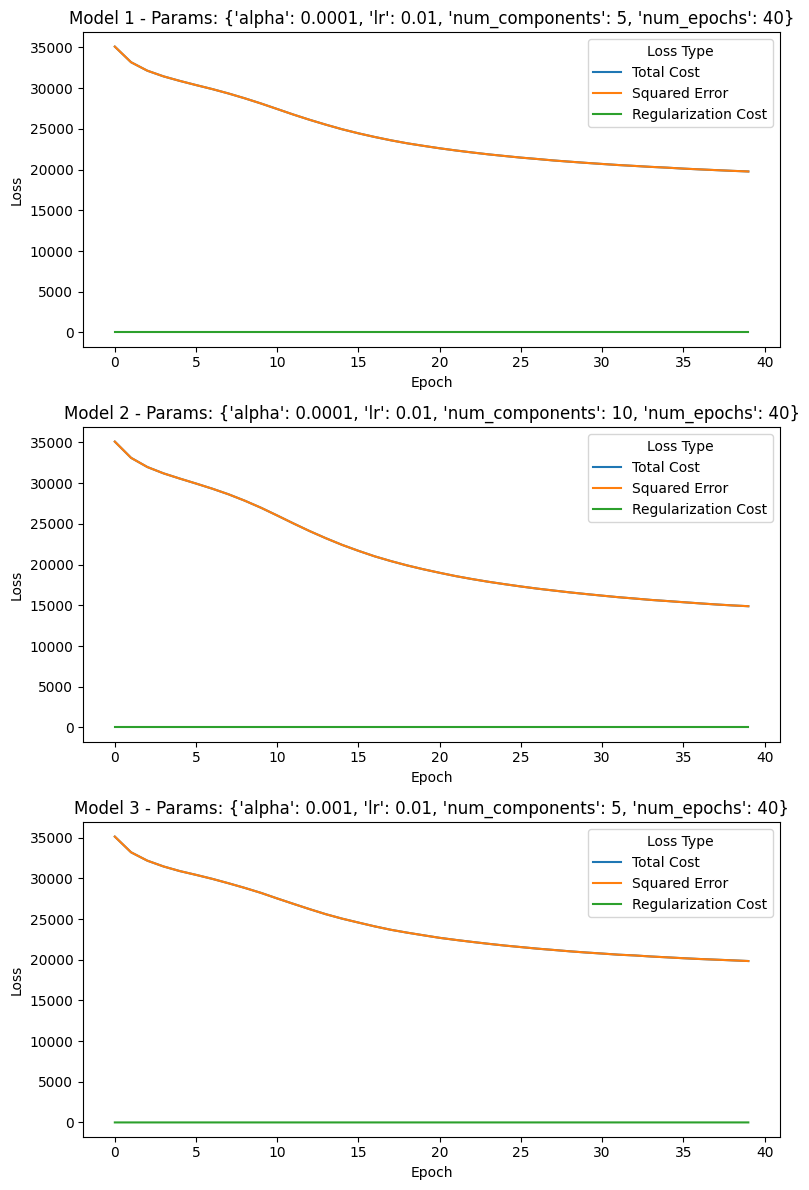

In [78]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

R, _, _ = create_rating_matrix(ratings)

params = [
    {"alpha": 1e-4, "lr": 0.01, "num_components": 5, "num_epochs": 40},
    {"alpha": 1e-4, "lr": 0.01, "num_components": 10, "num_epochs": 40},
    {"alpha": 1e-3, "lr": 0.01, "num_components": 5, "num_epochs": 40},
]

fig, axes = plt.subplots(nrows=3, figsize=(8, 12))

for i, param in enumerate(params):
    model = SparseMatrixFactorization(**param)
    _ = model.fit(R)
    
    mse = model.score(R)
    mae = model.score_mae(R)
    
    print(f"Model {i+1} - MSE: {mse}, MAE: {mae}")
    
    costs = np.array(model.epoch_end_cost_)
    total_costs = costs[:, 0]
    squared_errors = costs[:, 1]
    regularization_costs = costs[:, 2]
    
    epochs = np.arange(1, param['num_epochs'] + 1)

    epochs = range(param["num_epochs"])
    df = pd.DataFrame({
        'Epoch': epochs,
        'Total Cost': total_costs,
        'Squared Error': squared_errors,
        'Regularization Cost': regularization_costs
    }).melt(id_vars=['Epoch'], var_name='Loss Type', value_name='Loss')
    
    _ = sns.lineplot(data=df, x='Epoch', y='Loss', hue='Loss Type', ax=axes[i])
    _ = axes[i].set_title(f'Model {i+1} - Params: {param}')

plt.tight_layout()
plt.show()

### Aufgabe 2d

Diskutieren Sie die Grafiken. Interpretieren Sie die Unterschiede bezüglich der unterschiedlichen Hyper-Parameter.

Die 3 Modelle performen ähnlich gut. Folgende Feststellungen konnte übergreifend gemacht werden:
* Die **Regularisierungskosten** bleiben bei allen Modellen sehr niedrig und konstant. Über die Epochen steigen die Werte nur marginal an. Dies kann dem niedrigen $\lambda$-Wert zugeschrieben werden.
* Der **Squared-Error** folgen bei allen 3 Modellen einem ähnlichen Verlauf. Die Werte sinken über die Epochen von $35'000$ auf $20'000$ (Modell 1 und 3), resp. $15'000$ (Modell 2). Dies deutet darauf hin, dass die Bewertungen der Modelle immer besser werden. Die bessere Performance des Modells 2 liegt an der höheren Anzahl Komponenten (`num_components` / $K$).
* Die **Total-Kosten** sind aufgrund der tiefen Regularisierungskosten praktisch nicht von dem Squared-Error zu unterscheiden.
* MSE und MAE sind bei den Modellen 1 und 3 sehr ähnlich, während das Modell 2 leicht besser abschneidet. Auch hier ist die bessere Performance auf die höhere Anzahl Komponenten zurückzuführen.

Bewertung der Hyper-Parameter:
* **$\lambda$**: Es konnte keine Verhaltensänderungen des Modells bei unterschiedlichen $\lambda$-Werten festgestellt werden. Dies ist an den gleichen Regularisierungskosten der drei Modelle ersichtlich. Möglicherweise ist der Wert zu tief gewählt.
* $K$: Die Anzahl Komponenten $K$ hat einen Einfluss auf die Performance des Modells. Ein höherer Wert führt zu einer besseren Performance, da das Modell komplexer wird. Dies ist an den besseren Werten des Modells 2 ersichtlich.

## Aufgabe 3 (6 Punkte)

In dieser Aufgabe versuchen wir ein möglichst gutes Modell zu finden.


Sie werden dazu einen zufällig generierten Train-Test Split erstellen. Dabei soll immer genau ein zufällig ausgewähltes Rating pro User dem Test-Split zugeordnet werden, wobei die anderen Ratings dieses Users im Train-Split bleiben. Verwenden Sie dazu die Funktion `leave_one_out_split`.

In [79]:
def leave_one_out_split(X: np.ndarray, random_seed=123) -> Tuple[np.ndarray, np.ndarray]:
    """Split dataset by randomly assigning one element of each row to test, the others to train.
    
        Args:
            X: Ratings-Matrix [num_users, num_items]
            random_seed: for reproducibility

        Returns:
            Tuple(Xtrain [num_users, num_items], Xtest[num_users, num_items])
    """
    X_test = np.zeros_like(X)
    X_train = X.copy()
    
    random_state = np.random.RandomState(random_seed)

    for user_row in range(X.shape[0]):
        non_zero = X[user_row, :].nonzero()[0]
        item_col = random_state.choice(non_zero)
        X_test[user_row, item_col] = X[user_row, item_col]
        X_train[user_row, item_col] = 0

    return X_train, X_test


ratings = pd.read_csv('ratings.csv')
R, _, _ = create_rating_matrix(ratings)

X_train, X_test = leave_one_out_split(R)

assert np.bincount(X_test.nonzero()[0]).max() == 1, \
    "Each row (user) must have exactly 1 non-zero rating"

assert all((R > 0).sum(axis=1) - (X_train > 0).sum(axis=1)) == 1, \
    "Each user has exactly one rating less in the training set as compared to the full set"

### Aufgabe 3a

Vergleichen Sie mehrere Hyper-Parameter miteinander. Selektieren Sie das beste Modell gemäss _Mean Absolute Error_ (MAE) mit einem geeigneten Verfahren. Verwenden Sie dazu die Funktion `leave_one_out_split`.

In [80]:
import numpy as np
from sklearn.model_selection import GridSearchCV

def custom_mae_scorer(estimator, X):
    return -estimator.score_mae(X)

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'lr': [0.001, 0.01, 0.1],
    'num_components': [10, 20, 30],
    'num_epochs': [10, 20, 30]
}

model = SparseMatrixFactorization()

grid_search = GridSearchCV(model, param_grid, scoring=custom_mae_scorer, cv=2, verbose=2, n_jobs=-1)
_ = grid_search.fit(X_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best MAE: ", -grid_search.best_score_)

best_model = grid_search.best_estimator_
mae_test = best_model.score_mae(X_test)
print("Test MAE: ", mae_test)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
Best Parameters:  {'alpha': 0.1, 'lr': 0.01, 'num_components': 10, 'num_epochs': 20}
Best MAE:  0.7877202805370626
Test MAE:  0.7054979665739812


## Aufgabe 4 (5 Punkte)

In dieser Aufgabe versuchen wir die Qualität der Recommendations qualitativ zu beurteilen.

### Aufgabe 4a

Erstellen Sie Empfehlungen (z.B. Top-5 predicted Ratings) für die ersten 3 User in der Ratings-Matrix mit ihrem besten Modell und versuchen Sie die Empfehlungen ganz grob qualitativ zu beurteilen.

In [91]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
R, map_col_id_to_movie, map_row_id_to_user = create_rating_matrix(ratings)

X_train, X_test = leave_one_out_split(R)

model = SparseMatrixFactorization(alpha=0.1, lr=0.01, num_components=10, num_epochs=20, random_seed=123)
_ = model.fit(R)

predicted_ratings = model.predict()

def get_top_n_recommendations(user_id, predicted_ratings, n=5):
    user_idx = list(map_row_id_to_user.keys()).index(user_id)
    user_ratings = predicted_ratings[user_idx]
    top_n_movie_indices = user_ratings.argsort()[-n:][::-1]
    top_n_movie_ids = [map_col_id_to_movie[idx] for idx in top_n_movie_indices]
    top_n_ratings = user_ratings[top_n_movie_indices]
    return top_n_movie_ids, top_n_ratings

def get_movie_info(movie_ids, predicted_ratings=None):
    movie_info = movies[movies['movieId'].isin(movie_ids)].copy()
    if predicted_ratings is not None:
        movie_info['predictedRating'] = predicted_ratings
    return movie_info[['movieId', 'title', 'genres', 'year', 'runtime', 'isAdult', 'imdbRating', 'imdbVotes', 'predictedRating']]

recommendations = {user_id: get_top_n_recommendations(user_id, predicted_ratings, n=5) for user_id in range(1, 4)}
recommendations_info = {user_id: get_movie_info(recs[0], recs[1]) for user_id, recs in recommendations.items()}

def get_top_n_ratings(user_id, ratings_df, n=5):
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    top_n_ratings = user_ratings.sort_values(by='rating', ascending=False).head(n)
    return top_n_ratings.merge(movies, on='movieId')

top_ratings = {user_id: get_top_n_ratings(user_id, ratings, n=5) for user_id in range(1, 4)}

def process_genres(genres_array):
    genres_list = eval(genres_array)
    return genres_list

for user_id in range(1, 4):
    print(f"\nTop 5 Ratings für Benutzer {user_id}:\n")
    display(top_ratings[user_id][['movieId', 'timestamp', 'title', 'isAdult', 'year', 'runtime', 'genres', 'imdbRating', 'imdbVotes']])

    print(f"\nGenre-Verteilung der Top 5 Ratings für Benutzer {user_id}:\n")
    genres = top_ratings[user_id]['genres'].apply(process_genres).explode().value_counts()
    display(pd.DataFrame(genres))
    
    print(f"\nTop 5 Empfehlungen für Benutzer {user_id}:\n")
    display(recommendations_info[user_id])


Top 5 Ratings für Benutzer 1:



,movieId,timestamp,title,isAdult,year,runtime,genres,imdbRating,imdbVotes
0,5060,2000-07-30 19:06:42,M*A*S*H,0,1970,116,"['Comedy', 'Drama', 'War']",7.4,76966
1,1275,2000-07-30 18:38:10,Highlander,0,1986,116,"['Action', 'Adventure', 'Fantasy']",7.0,147547
2,2716,2000-07-30 18:56:54,Ghostbusters,0,1984,105,"['Action', 'Comedy', 'Fantasy']",7.8,450642
3,1617,2000-07-30 18:49:11,L.A. Confidential,0,1997,138,"['Crime', 'Drama', 'Mystery']",8.2,618206
4,1587,2000-07-30 18:39:06,Conan the Barbarian,0,1982,129,"['Action', 'Adventure', 'Fantasy']",6.9,162596



Genre-Verteilung der Top 5 Ratings für Benutzer 1:



,count
genres,
Action,3
Fantasy,3
Comedy,2
Drama,2
Adventure,2
War,1
Crime,1
Mystery,1



Top 5 Empfehlungen für Benutzer 1:



,movieId,title,genres,year,runtime,isAdult,imdbRating,imdbVotes,predictedRating
613,1178,Paths of Glory,"['Drama', 'War']",1957,88,0,8.4,212427,4.575312
1605,3266,Man Bites Dog,"['Comedy', 'Crime', 'Drama']",1992,95,0,7.4,43744,4.542924
1670,3451,Guess Who's Coming to Dinner,"['Comedy', 'Drama']",1967,108,0,7.8,48948,4.530911
2335,6460,The Trial,"['Drama', 'Mystery', 'Thriller']",1962,119,0,7.6,24043,4.480382
3638,177593,"Three Billboards Outside Ebbing, Missouri","['Comedy', 'Crime', 'Drama']",2017,115,0,8.1,555419,4.479364



Top 5 Ratings für Benutzer 2:



,movieId,timestamp,title,isAdult,year,runtime,genres,imdbRating,imdbVotes
0,122882,2015-10-24 19:34:32,Mad Max: Fury Road,0,2015,120,"['Action', 'Adventure', 'Sci-Fi']",8.1,1087389
1,60756,2015-10-24 19:29:40,Step Brothers,0,2008,98,['Comedy'],6.9,319211
2,89774,2015-10-24 19:33:09,Warrior,0,2011,140,"['Action', 'Drama', 'Sport']",8.1,498153
3,80906,2015-10-24 19:32:52,Inside Job,0,2010,109,"['Crime', 'Documentary']",8.2,78998
4,106782,2015-10-24 19:29:26,The Wolf of Wall Street,0,2013,180,"['Biography', 'Comedy', 'Crime']",8.2,1584689



Genre-Verteilung der Top 5 Ratings für Benutzer 2:



,count
genres,
Action,2
Comedy,2
Crime,2
Adventure,1
Sci-Fi,1
Drama,1
Sport,1
Documentary,1
Biography,1



Top 5 Empfehlungen für Benutzer 2:



,movieId,title,genres,year,runtime,isAdult,imdbRating,imdbVotes,predictedRating
1552,3153,The 7th Voyage of Sinbad,"['Action', 'Adventure', 'Family']",1958,88,0,7.0,14772,3.086389
1769,3703,Mad Max 2: The Road Warrior,"['Action', 'Adventure', 'Sci-Fi']",1981,96,0,7.6,193899,2.937530
2636,27156,Neon Genesis Evangelion: The End of Evangelion,"['Action', 'Animation', 'Drama']",1997,87,0,8.1,64360,2.932542
3277,86345,Louis C.K.: Hilarious,['Comedy'],2010,82,0,8.3,12832,2.866621
3451,106642,The Day of the Doctor,"['Adventure', 'Drama', 'Sci-Fi']",2013,77,0,9.3,19823,2.865176



Top 5 Ratings für Benutzer 3:



,movieId,timestamp,title,isAdult,year,runtime,genres,imdbRating,imdbVotes
0,849,2011-05-27 02:33:31,Escape from L.A.,0,1996,101,"['Action', 'Adventure', 'Sci-Fi']",5.7,80597
1,3703,2011-05-27 02:33:23,Mad Max 2: The Road Warrior,0,1981,96,"['Action', 'Adventure', 'Sci-Fi']",7.6,193899
2,1587,2011-05-27 02:40:03,Conan the Barbarian,0,1982,129,"['Action', 'Adventure', 'Fantasy']",6.9,162596
3,3024,2011-05-27 02:40:54,Piranha,0,1978,94,"['Comedy', 'Horror', 'Sci-Fi']",5.9,24735
4,2288,2011-05-27 02:33:51,The Thing,0,1982,109,"['Horror', 'Mystery', 'Sci-Fi']",8.2,467047



Genre-Verteilung der Top 5 Ratings für Benutzer 3:



,count
genres,
Sci-Fi,4
Action,3
Adventure,3
Horror,2
Fantasy,1
Comedy,1
Mystery,1



Top 5 Empfehlungen für Benutzer 3:



,movieId,title,genres,year,runtime,isAdult,imdbRating,imdbVotes,predictedRating
642,1212,The Third Man,"['Film-Noir', 'Mystery', 'Thriller']",1949,93,0,8.1,181911,4.478419
1670,3451,Guess Who's Coming to Dinner,"['Comedy', 'Drama']",1967,108,0,7.8,48948,4.257604
2335,6460,The Trial,"['Drama', 'Mystery', 'Thriller']",1962,119,0,7.6,24043,4.243329
2636,27156,Neon Genesis Evangelion: The End of Evangelion,"['Action', 'Animation', 'Drama']",1997,87,0,8.1,64360,4.238783
3451,106642,The Day of the Doctor,"['Adventure', 'Drama', 'Sci-Fi']",2013,77,0,9.3,19823,4.220438


### Aufgabe 4b

Was halten Sie von den Empfehlungen? Was ist ihr Gesamteindruck vom Projekt? Geben Sie Daniele Feedback zu ihren Erkenntnissen.

Die vorgeschlagenen Filme für die ersten 3 Benutzer scheinen nicht wirklich plausibel. Dies, da zwischen den Genres der Empfehlungen und den bereits vom User bewerteten Filmen nur geringfügige Überschneidungen vorhanden sind. Beim User 1 kommen unter den Top 5 Filmen vom Benutzer z.B. die Genres Action und Fantasy vor - beide Kategorien sind aber in den Empfehlungen nicht vertreten. 

Ich bewerte den Erfolg des Modells nicht hoch. Die in Aufgabe 4 erhaltenen Vorschläge, wie auch die in Aufgabe 3 erreichte MAE sind nicht zufriedenstellend. Ich vermute, dass die Datenbasis zu klein ist, um ein aussagekräftiges Modell zu erstellen.